In [1]:
filepath = './原书代码数据/chapter11/demo/data/discdata.xls'
data = pd.read_excel(filepath)
data[:5]

,SYS_NAME,NAME,TARGET_ID,DESCRIPTION,ENTITY,VALUE,COLLECTTIME
0,财务管理系统,CWXT_DB,184,磁盘已使用大小,C:\,3.427079e+07,2014-10-01
1,财务管理系统,CWXT_DB,184,磁盘已使用大小,D:\,8.026259e+07,2014-10-01
2,财务管理系统,CWXT_DB,183,磁盘容量,C:\,5.232332e+07,2014-10-01
3,财务管理系统,CWXT_DB,183,磁盘容量,D:\,1.572833e+08,2014-10-01
4,财务管理系统,CWXT_DB,184,磁盘已使用大小,C:\,3.432890e+07,2014-10-02


<Figure size 720x360 with 0 Axes>

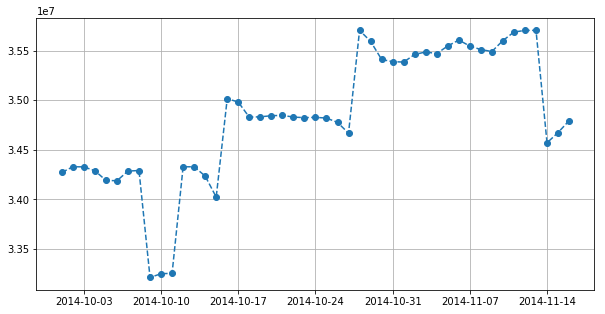

In [2]:
result_c = data[(data['ENTITY'] == 'C:\\') & (data.TARGET_ID == 184)][['COLLECTTIME','VALUE']].set_index('COLLECTTIME')
plt.figure(figsize=(10,5))
plt.plot(result_c.index.values,result_c['VALUE'].values,'o--')
plt.grid()

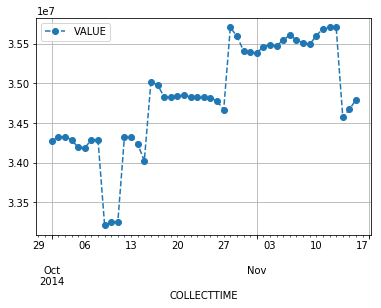

In [3]:
result_c.plot(style='o--',grid=True)

<Figure size 720x360 with 0 Axes>

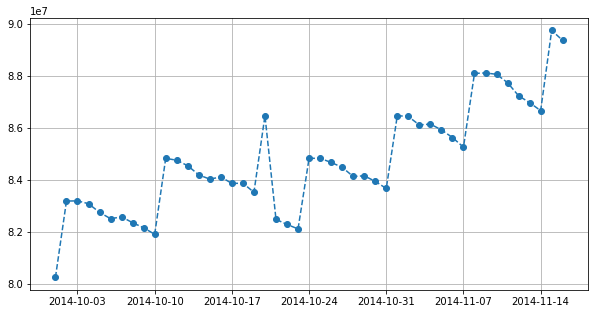

In [4]:
result_d = data[(data['ENTITY'] == 'D:\\') & (data.TARGET_ID == 184)][['COLLECTTIME','VALUE']].set_index('COLLECTTIME')
plt.figure(figsize=(10,5))
plt.plot(result_d.index.values,result_d['VALUE'].values,'o--')
plt.grid()

In [5]:
result_all = data[(data.TARGET_ID == 184)]

In [18]:
def attr_trans(x):
    result_trans = Series(index=['SYS_NAME','CWXT_DB:184:C:\\','CWXT_DB:184:D:\\','COLLECTTIME'])
    result_trans['SYS_NAME'] = x['SYS_NAME'].iloc[0]
    result_trans['COLLECTTIME'] = x['COLLECTTIME'].iloc[0]
    result_trans['CWXT_DB:184:C:\\'] = x['VALUE'].iloc[0]
    result_trans['CWXT_DB:184:D:\\'] = x['VALUE'].iloc[1]
    
    return result_trans

x = result_all.groupby('COLLECTTIME')

In [19]:
result_t = result_all.groupby('COLLECTTIME').apply(attr_trans)
result_t[:5]

,SYS_NAME,CWXT_DB:184:C:\,CWXT_DB:184:D:\,COLLECTTIME
COLLECTTIME,,,,
2014-10-01,财务管理系统,34270787.33,80262592.65,2014-10-01
2014-10-02,财务管理系统,34328899.02,83200151.65,2014-10-02
2014-10-03,财务管理系统,34327553.50,83208320.00,2014-10-03
2014-10-04,财务管理系统,34288672.21,83099271.65,2014-10-04
2014-10-05,财务管理系统,34190978.41,82765171.65,2014-10-05


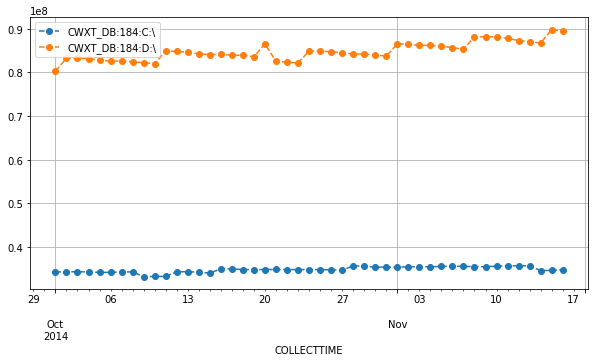

In [21]:
result_t.loc[:,['CWXT_DB:184:C:\\','CWXT_DB:184:D:\\']].plot(kind='line',style='o--',grid=True,figsize=(10,5))

c:\python36\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


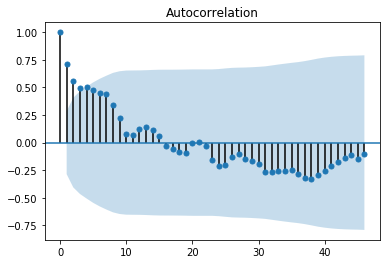

In [31]:
result_t_d = result_t.loc[:,'CWXT_DB:184:D:\\']
#自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(result_t_d).show()